# Dominant Countries In International Soccer According to FIFA Rankings

## Usual imports and initial loading of the data 

In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set()

df = pd.read_csv('fifa_ranking.csv')
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


- We focus on a handful of columns in this data 

In [17]:
df = df.loc[:, ['rank', 'country_abrv', 'total_points','confederation', 'rank_date']]
df.head()

,rank,country_abrv,total_points,confederation,rank_date
0,1,GER,0.0,UEFA,1993-08-08
1,2,ITA,0.0,UEFA,1993-08-08
2,3,SUI,0.0,UEFA,1993-08-08
3,4,SWE,0.0,UEFA,1993-08-08
4,5,ARG,0.0,CONMEBOL,1993-08-08


## Formatting the date 

In [18]:
def year(date):
    return int(date.split('-')[0])

def month(date):
    return int(date.split('-')[1])

def day(date):
    return int(date.split('-')[2])

def fdate(date):
    return datetime.datetime(year(date), month(date),  day(date))
   

df['date'] = df['rank_date'].apply(fdate)
df = df.drop('rank_date', axis=1)
df.head()

,rank,country_abrv,total_points,confederation,date
0,1,GER,0.0,UEFA,1993-08-08
1,2,ITA,0.0,UEFA,1993-08-08
2,3,SUI,0.0,UEFA,1993-08-08
3,4,SWE,0.0,UEFA,1993-08-08
4,5,ARG,0.0,CONMEBOL,1993-08-08


## Number of Countries ranked over time 

Text(0.5, 1.0, 'Number of countries ranked over time')

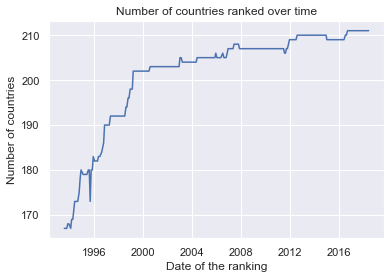

In [20]:
countries_ranked = df.groupby('date')['rank'].count()

plt.plot(countries_ranked.index, countries_ranked.values)
plt.xlabel("Date of the ranking")
plt.ylabel('Number of countries')
plt.title('Number of countries ranked over time')

## Average of points 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Means of FIFA Points')

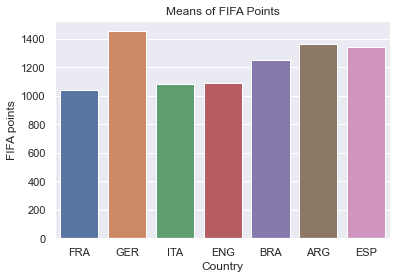

In [22]:
list_of_countries = ['FRA', 'GER', 'ITA', 'ENG', 'BRA', 'ARG', 'ESP']

df_points = df[df['date'] >= datetime.datetime(2011,8,24)]

stats = df_points.groupby('country_abrv')['total_points'].aggregate(['mean', np.std])
sns.barplot(list_of_countries, stats.loc[list_of_countries, 'mean'])
plt.xlabel('Country')
plt.ylabel('FIFA points')
plt.title('Means of FIFA Points')

## Time Series of points 

In [30]:
df_points.loc[df_points['country_abrv'] == 'FRA', ['date']]

,date
40395,2011-08-24
40596,2011-09-21
40806,2011-10-19
41013,2011-11-23
41221,2011-12-21
...,...
56746,2018-02-15
56957,2018-03-15
57166,2018-04-12
57377,2018-05-17


Text(0, 0.5, 'FIFA points')

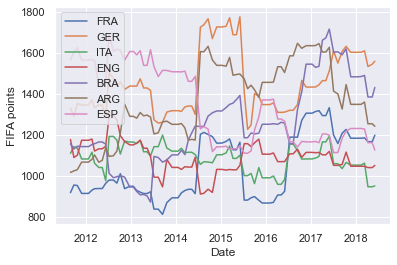

In [31]:
for country in list_of_countries:
    series1 = df_points.loc[df_points['country_abrv'] == country, 'total_points']
    series2 = df_points.loc[df_points['country_abrv'] == country, 'date']
    plt.plot(series2.values, series1.values, label=country)

plt.legend()
plt.xlabel("Date")
plt.ylabel("FIFA points")

## Compared histograms 

Text(0.5, 1.0, 'Compared histograms')

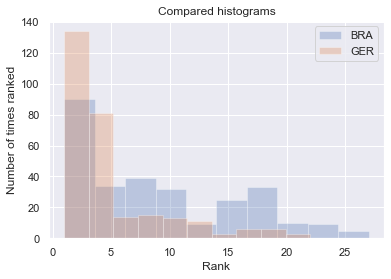

In [32]:
sublist = ['BRA', 'GER']
for i in range(len(sublist)):
    country_rankings = df[df['country_abrv'] == list_of_countries[i]]['rank']
    plt.hist(country_rankings, alpha=0.3,label=sublist[i])

plt.legend()
plt.xlabel('Rank')
plt.ylabel('Number of times ranked')
plt.title('Compared histograms')